# Bagging

Training D1_D2 dataset using the `Bagging` ensemble method.

### Author
Richard Li

In [1]:
# import libraries
import warnings
import numpy as np

warnings.filterwarnings(action='ignore')

# import custom class
from tadpole import Tadpole

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, confusion_matrix

# import visualization library
from matplotlib import pyplot as plt

%matplotlib inline

### Data Loading + Preprocessing

In [2]:
# initialize class
tp = Tadpole(debug=True)

In [3]:
# load and pre-process tadpole dataset
tp.load()
print(tp.label_dict)

loading tadpole dataset
pre-processing dataset
{0: 'AD', 1: 'CN', 2: 'MCI'}


##### Split data into Train and Test datasets

In [4]:
# train-test split
tp.split()

splitting dataset to train and test datasets


In [5]:
# import variables from class instance (notebook compatibility)
label_dict = tp.label_dict
X, y, X_train, X_test, y_train, y_test = tp.X, tp.y, tp.X_train, tp.X_test, tp.y_train, tp.y_test

### Helper functions

In [6]:
def showConfusionMatrix(clf, X, y):
    cm = confusion_matrix(y, clf.predict(X))
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm, cmap='GnBu')
    ax.grid(False)

    # For 3 categories
    ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Predicted ' + label_dict[0], 'Predicted ' + label_dict[1], 
                                              'Predicted ' + label_dict[2]))
    ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Actual ' + label_dict[0], 'Actual ' + label_dict[1], 
                                              'Actual ' + label_dict[2]))

    for i in range(3):
        for j in range(3):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.title('Test Data Confusion Matrix')
    plt.show()

def accuracy(clf, X, y):
    y_pred = clf.predict(X)
    acc = sum(y_pred == y) / len(y)
    return acc

def metrics(clf, X, y):
    y_pred = clf.predict(X)
    y_prob = clf.predict_proba(X)
    BCA = balanced_accuracy_score(y, y_pred)
    mAUC = roc_auc_score(y, y_prob, multi_class="ovo", average="macro")
    return BCA, mAUC

In [7]:
def report_accuracy(clf):
    train_acc = accuracy(clf, X_train, y_train)
    test_acc = accuracy(clf, X_test, y_test)
    print('Train accuracy:', train_acc)
    print('Test accuracy:', test_acc)
    
def report_metrics(clf, verbose):
    BCA_train, mAUC_train = metrics(clf, X_train, y_train)
    BCA_test, mAUC_test = metrics(clf, X_test, y_test)
    
    if verbose:
        print('\tTrain metrics')    
        print('BCA_train:', BCA_train)
        print('mAUC_train:', mAUC_train)

        print('\tTest metrics')   
        print('BCA_test:', BCA_test)
        print('mAUC_test:', mAUC_test)
    
    showConfusionMatrix(clf, X_test, y_test)
    return BCA_train, BCA_test, mAUC_train, mAUC_test

Settings are not final.

In [8]:
def bagging_clf(clf):
    return BaggingClassifier(base_estimator = clf, 
                             n_estimators = 100, 
                             max_samples = 0.3, 
                             random_state = 0)

In [9]:
def evaluate(Classifier, verbose=False, **kwargs):
    if verbose: print('+ Base learner')
    clf = Classifier(**kwargs).fit(X_train, y_train)
    clf_perf = report_metrics(clf, verbose)
    
    if verbose: print('\n+ Ensemble')
    bag_clf = bagging_clf(Classifier(**kwargs)).fit(X_train, y_train)
    bag_clf_perf = report_metrics(bag_clf, verbose)
    
    # Values in dict are lists of the following format: 
    # BCA_train, BCA_test, mAUC_train, mAUC_test
    if not verbose:
        return {'clf': list(clf_perf), 'bag_clf': list(bag_clf_perf)}

In [10]:
# Make a main for every baselearner that runs them multiple times
# because SVC requires extra arguments, which makes it difficult
# to generalize into one function.

# def main(verbose=False):
#     baselearners = [DecisionTreeClassifier, 
#                     SVC, 
#                     MLPClassifier,
#                     LogisticRegression]
    
#     for learner in baselearners:           
#         if verbose:
#             print(learner)
#             evaluate(learner, True)
#             print()
#         else:
#             perf = evaluate(learner)

## Models

### DTC

+ Base learner
	Train metrics
BCA_train: 1.0
mAUC_train: 1.0
	Test metrics
BCA_test: 0.8153430619559652
mAUC_test: 0.861507296466974


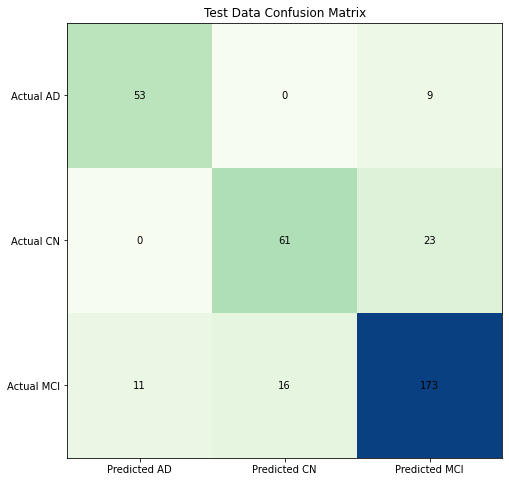


+ Ensemble
	Train metrics
BCA_train: 0.917524219782151
mAUC_train: 0.9940879940039782
	Test metrics
BCA_test: 0.8913722478238607
mAUC_test: 0.9723823924731182


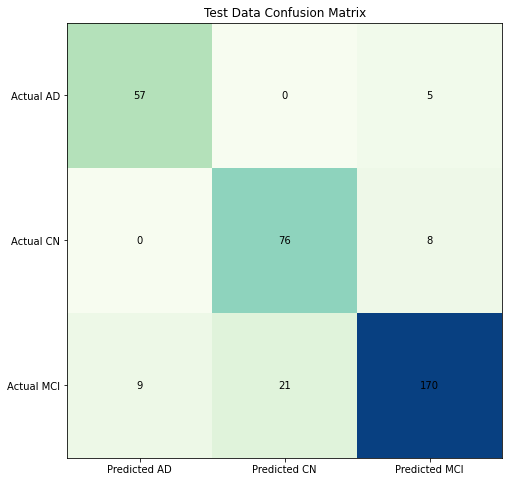

In [11]:
evaluate(DecisionTreeClassifier, True)

### SVM

+ Base learner
	Train metrics
BCA_train: 0.8802071684432008
mAUC_train: 0.9743890664682949
	Test metrics
BCA_test: 0.8583384536610343
mAUC_test: 0.9651785714285714


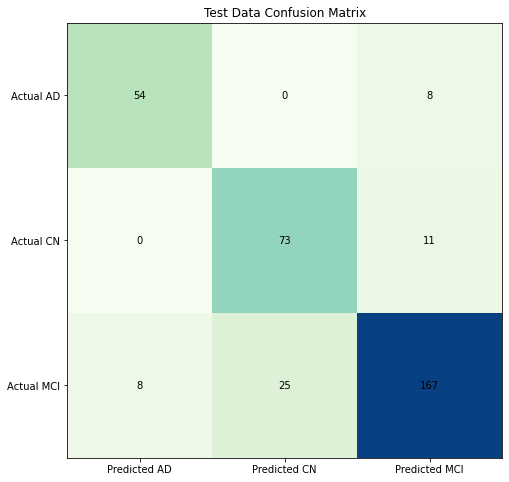


+ Ensemble
	Train metrics
BCA_train: 0.8237022676956377
mAUC_train: 0.9630591443422594
	Test metrics
BCA_test: 0.8315924219150026
mAUC_test: 0.9595238095238096


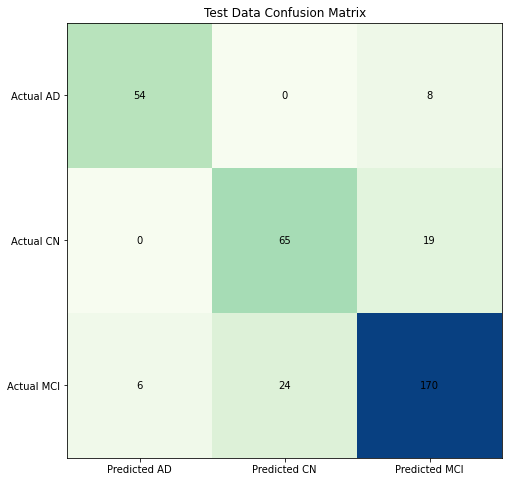

In [12]:
evaluate(SVC, True, probability=True)

### ANN

+ Base learner
	Train metrics
BCA_train: 0.8806730053049462
mAUC_train: 0.9733088710787534
	Test metrics
BCA_test: 0.8835765488991295
mAUC_test: 0.9691170634920635


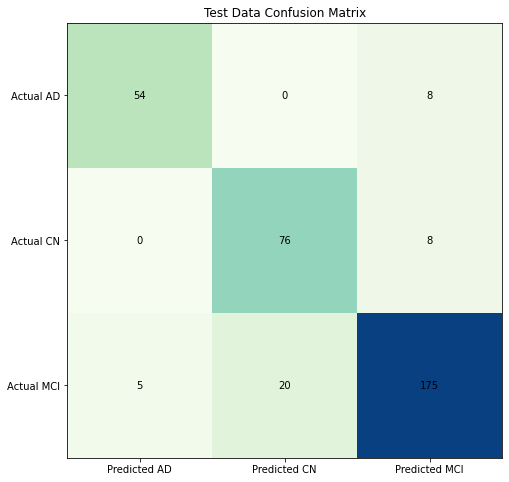


+ Ensemble
	Train metrics
BCA_train: 0.8052836460000696
mAUC_train: 0.9566161506035402
	Test metrics
BCA_test: 0.793200204813108
mAUC_test: 0.9537624807987711


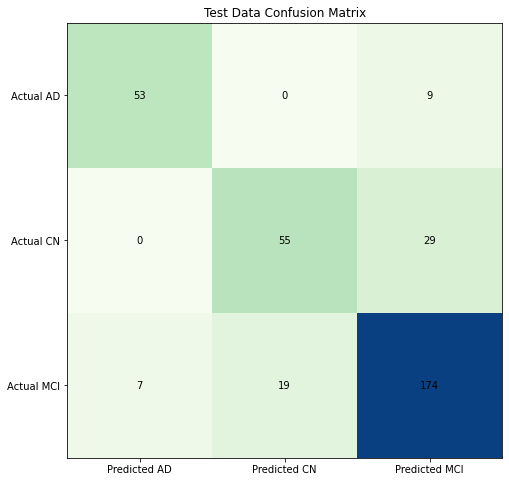

In [13]:
evaluate(MLPClassifier, True)

### LRA

+ Base learner
	Train metrics
BCA_train: 0.8097880755915684
mAUC_train: 0.9601234307359686
	Test metrics
BCA_test: 0.7994905273937531
mAUC_test: 0.9592767537122375


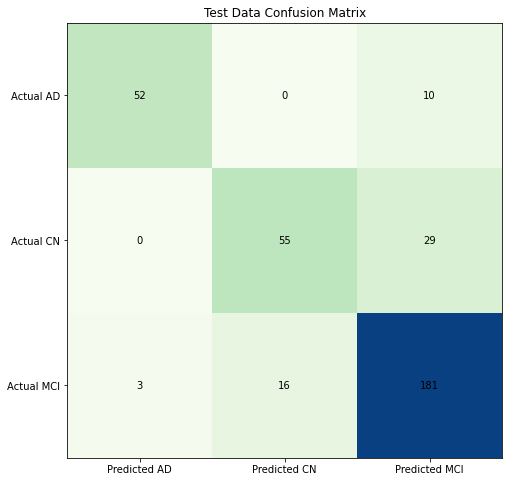


+ Ensemble
	Train metrics
BCA_train: 0.7232919225481128
mAUC_train: 0.9453789312376237
	Test metrics
BCA_test: 0.7256426011264722
mAUC_test: 0.9463194444444444


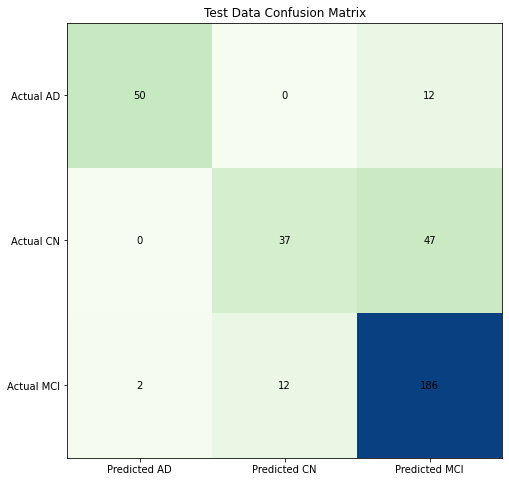

In [14]:
evaluate(LogisticRegression, True)